## Importing all required libraries

In [1]:
import pandas as pd
import statsmodels.api as sm

## Part 1

In [2]:
# Importing all data files
prob_results = pd.read_csv('RecessionIndicator.csv', index_col=0)
appendix = pd.read_csv('FRED-MD-Appendix.csv')

# Filter the appendix to get only the financial variables (group 8)
financial_vars = appendix[appendix['group'] == 8]

In [3]:
#These steps form the transformed dataset from Question B
FRED_TF = pd.read_csv('2023-09-TF.csv', header=0)
FRED_TF = FRED_TF.set_index('sasdate')
FRED_TF.index = pd.PeriodIndex(FRED_TF.index, freq='M')

In [4]:
# Loop through each financial variable
for var in financial_vars['fred']:
    y = FRED_TF[var]['2005-02':'2021-02']
    y = y.values.reshape(-1,1)

    # Lag the recession probabilities by 1 month
    x = prob_results.shift(1)
    x = x.dropna()

    # Add a constant term to x
    X = sm.add_constant(x)
    print(X.shape)
    print(y.shape)

    # Fit a linear regression model using OLS
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Print the summary of the model
    print(results.summary())
    

(193, 2)
(193, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     15.78
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           0.000101
Time:                        22:28:45   Log-Likelihood:                 361.39
No. Observations:                 193   AIC:                            -718.8
Df Residuals:                     191   BIC:                            -712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.003  

## Part 2

In [5]:
# Loop through each financial variable
for var in financial_vars['fred']:
    y = FRED_TF[var]['2005-02':'2021-02']
    y = y.values.reshape(-1,1)

    # Create the first lag of the financial variable
    x = FRED_TF[var].shift(1)['2005-02':'2021-02']
    x = x.dropna()

    # Add a constant term to x
    X = sm.add_constant(x)
    print(X.shape)
    print(y.shape)

    # Fit a linear regression model using OLS
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Print the summary of the model
    print(results.summary())


(193, 2)
(193, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.492
Date:                Thu, 04 Jan 2024   Prob (F-statistic):            0.00399
Time:                        22:28:47   Log-Likelihood:                 357.93
No. Observations:                 193   AIC:                            -711.9
Df Residuals:                     191   BIC:                            -705.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.003  

## Part 3

In [7]:
!pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.8 kB 2.4 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.8 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 2.6 MB/s eta 0:00:00


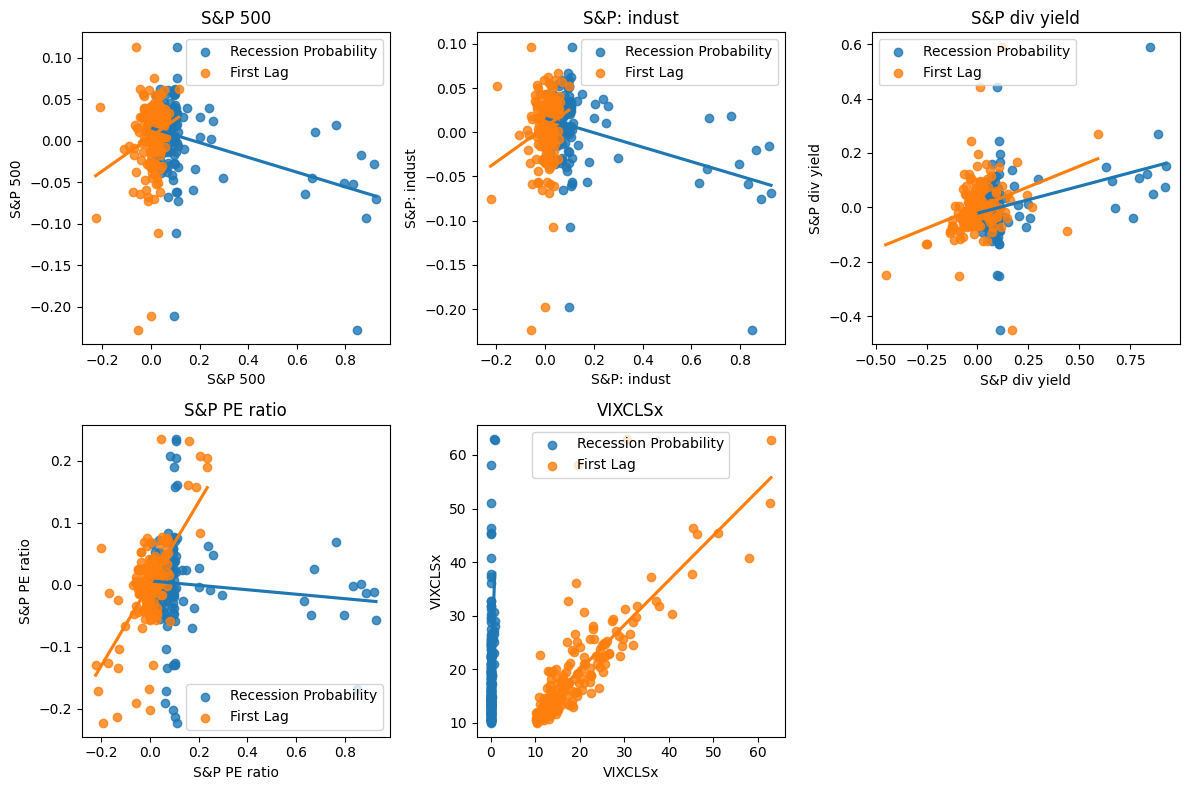

In [9]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#set the figure size
fig = plt.figure(figsize=(12, 8))

#loop through each financial variable
for i, var in enumerate(financial_vars['fred']):
    #create a subplot for each variable
    plt.subplot(2, 3, i+1)
    
    #plot the scatterplot with the recession probability model
    sns.regplot(x=prob_results['SVC'], y=FRED_TF[var]['2005-01':'2021-02'], ci=None, label='Recession Probability')
    
    #plot the scatterplot with the first lag model
    sns.regplot(x=FRED_TF[var].shift(1)['2005-02':'2021-02'], y=FRED_TF[var]['2005-02':'2021-02'], ci=None, label='First Lag')
    
    #add the title and legend
    plt.title(var)
    plt.legend()
    
#show the plots
plt.tight_layout()
plt.show()
